# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Применение-алгоритмов-машинного-обучения-для-задачи-банковского-скоринга" data-toc-modified-id="Применение-алгоритмов-машинного-обучения-для-задачи-банковского-скоринга-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Применение алгоритмов машинного обучения для задачи банковского скоринга</a></div>

# Применение алгоритмов машинного обучения для задачи банковского скоринга

Входными данными являются наборы для обучения и для тестирования:
* bank_scoring_train.csv.gz
* bank_scoring_test.csv.gz

Описание полей:
* SeriousDlqin2yrs - Флаг выхода на просрочку через 90 дней
* RevolvingUtilizationOfUnsecuredLines - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости, и без задолженности по кредитам, таким как автокредиты, деленные на сумму кредитных лимитов
* age - Возраст заёмщика в годах
* NumberOfTime30-59DaysPastDueNotWorse - Сколько раз заемщик просрочил выплату не более, чем на 30-59 дней, за последние 2 года.
* DebtRatio - Ежемесячные платежи по долгам, алименты и прожиточные расходы, делённые на месячный валовый доход
* MonthlyIncome - Ежемесячный доход
* NumberOfOpenCreditLinesAndLoans - Количество открытых кредитов (например, автокредит или закладная, кредитные карты и т.д.)
* NumberOfTimes90DaysLate - Сколько раз заёмщик просрочил выплату на 90 дней и более.
* NumberRealEstateLoansOrLines - Количество ипотечных кредитов и кредитов на недвижимость
* NumberOfTime60-89DaysPastDueNotWorse - Сколько раз заёмщик просрочил выплату не более, чем на 60-89 дней, за последние 2 года.
* NumberOfDependents - Количество иждивенцев в семье, исключая самого заёмщика (супруга, дети и т.д.)

Целевой переменной является SeriousDlqin2yrs

** Рекомендации по использованию моделей, метрик и кросс-валидации представлены в compare_algorithms_emp **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [4]:
df_train = pd.read_csv('bank_scoring_train.csv', sep='\t')
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.975614,39,1,0.678552,1850.0,4,0,0,0,3.0
1,0,0.006634,75,0,0.082087,10500.0,21,0,1,0,0.0
2,0,0.227432,48,1,0.202145,6059.0,9,0,1,0,3.0
3,0,0.290217,59,0,0.674392,4400.0,6,0,2,0,0.0
4,0,0.000000,80,0,0.000000,2596.0,2,0,0,0,1.0


In [5]:
df_test = pd.read_csv('bank_scoring_test.csv', sep='\t')
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.163412,43,0,0.537356,8833.0,11,0,3,0,2.0
1,0,0.928872,48,2,0.149728,9750.0,6,0,2,1,0.0
2,0,0.100996,63,0,0.281506,5736.0,5,0,1,0,0.0
3,0,0.110392,57,0,0.219982,12500.0,16,0,2,0,2.0
4,0,0.143659,42,0,0.401813,7500.0,6,0,1,0,2.0


In [6]:
def count_result(data):
    counts = [0, 0]
    for item in data:
        if item:
            counts[1] += 1
        else:
            counts[0] += 1
    plt.figure()
    plt.figure(figsize = (5, 5))
    plt.pie(counts, autopct='%1.1f%%', labels = counts)
    plt.show()

In [7]:
def KNeighbors_show(num_neighbors):
    target_train_vec = df_train['SeriousDlqin2yrs']
    neigh = KNeighborsClassifier(n_neighbors=num_neighbors)
    neigh.fit(df_train.values[:,1:], target_train_vec) 
    result = neigh.predict(df_test.values[:,1:]) # к какому классу относится аргумент 
    count_result(result)
   

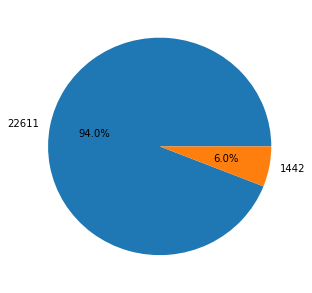

In [8]:
KNeighbors_show(1)

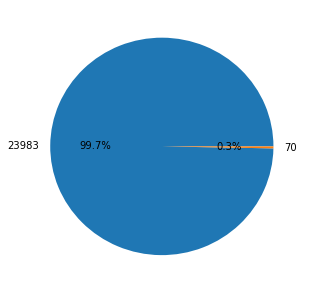

In [9]:
KNeighbors_show(10)

In [10]:
''' Example KNeighborsClassifier'''
X = [[0], [1], [2], [2]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

print(neigh.predict([[2]])) # к какому классу относится аргумент 
print(neigh.predict_proba([[2]])) # вероятность отнесения к каждому классу

[1]
[[ 0.33333333  0.66666667]]


In [11]:
def TreeClassifier_show(my_max_depth):
    target_train_vec = df_train['SeriousDlqin2yrs']
    dt_stump = DecisionTreeClassifier(max_depth=my_max_depth, min_samples_leaf=1)
    dt_stump.fit(df_train.values[:,1:], target_train_vec)
    result_2 = dt_stump.predict(df_test.values[:,1:])
    count_result(result_2)



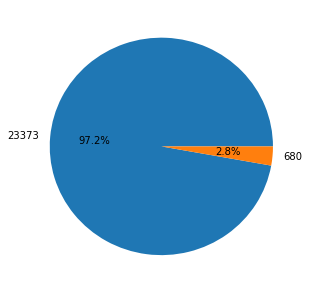

In [12]:
TreeClassifier_show(10)

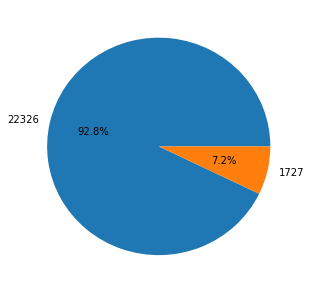

In [13]:
TreeClassifier_show(50)

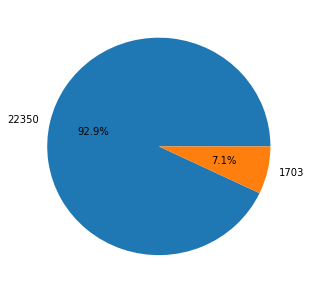

In [14]:
TreeClassifier_show(None)

In [15]:
def LogisticRegression_show():
    target_train_vec = df_train['SeriousDlqin2yrs']
    LogReg = LogisticRegression().fit(df_train.values[:,1:], target_train_vec)
    result_3  = LogReg.predict(df_test.values[:,1:])
    count_result(result_3)

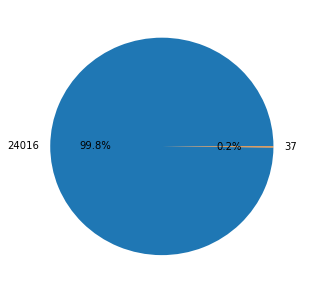

In [16]:
LogisticRegression_show()

In [17]:
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 
print(clf.predict([[-0.8, -1]]))

[1]


In [18]:
target_train_vec = df_train['SeriousDlqin2yrs']
clf = SVC()
#clf.fit(df_train.values[:,1:], target_train_vec)

#clf.fit(df_train.values[:,1:], target_train_vec)
#clf.fit(df_train, target_train_vec)
#count_result(result_4)

In [19]:
## Анализ работы (метрики):

In [37]:
target_train_vec = df_train['SeriousDlqin2yrs']
size = len(target_train_vec)
train_part = target_train_vec[:size//2]
test_part = target_train_vec[size//2:]
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(df_train.values[:size//2,1:], train_part) 
result = neigh.predict(df_train.values[size//2:,1:]) # к какому классу относится аргумент 

f1_score_res = f1_score(test_part, result, average='macro') 
accurcy_score_res = accuracy_score(test_part, result)
print (f1_score_res, accurcy_score_res)

0.488734569946 0.93038579862


[0.4887345699457738, 0.93038579861977222]


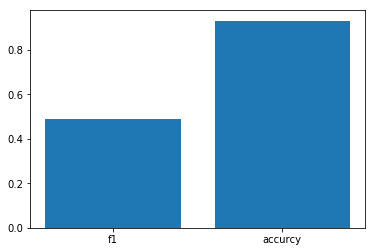

In [47]:
values = [f1_score_res, accurcy_score_res]
X = np.arange(len(values))
print(values)
plt.figure()
plt.bar(X, values)
plt.xticks(X, ['f1', 'accurcy'])
plt.show()